Time Series:
Start = 1980 
End = 2007 
Frequency = 1 
 [1] 70.2 71.1 71.7 72.3 73.1 72.9 74.4 75.4 76.0 76.9 77.4 78.2 78.9 78.7 79.0
[16] 78.0 80.0 79.8 80.3 80.5 80.7 81.1 81.5 81.9 82.3 82.7 83.2 83.5


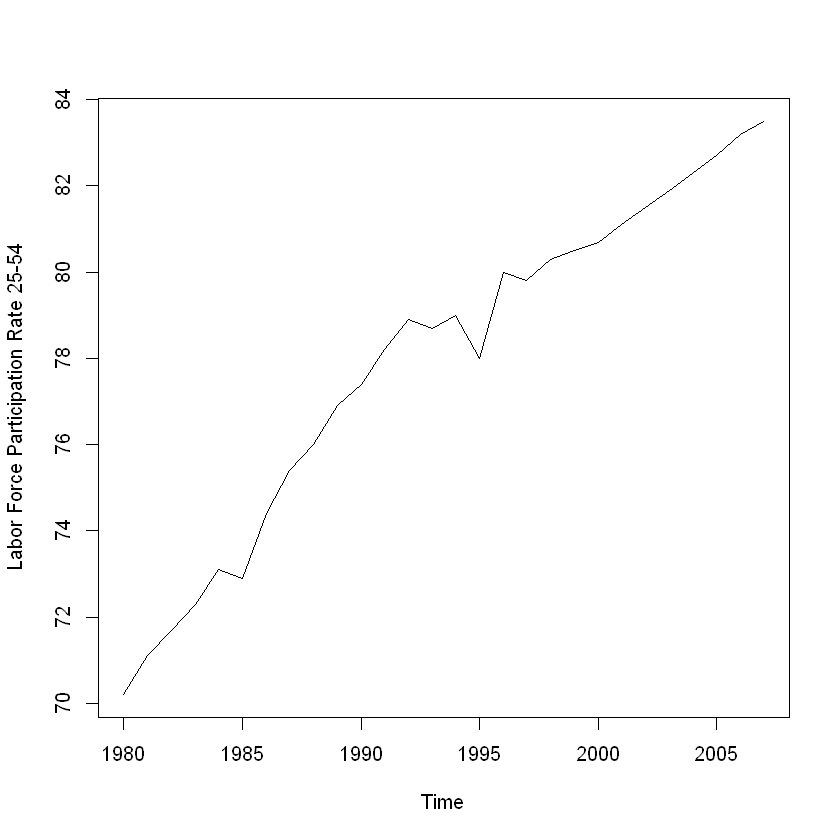

In [22]:
# Import forecast library, copy paste values from singapore row on https://docs.google.com/spreadsheets/d/1frieoKODnD9sX3VCZy5c3QAjBXMY-vN7k_I9gR-gcU8/pub#.
# Plot the data after adding the time series.
# The goal of this project is to use Holt's method and ARIMA to forecast the data, plot the forecasted data and compare it with the actual data.
library(forecast)
library(ggplot2)
singapore <- c(70.19999695, 71.09999847, 71.69999695, 72.30000305, 73.09999847, 72.90000153, 74.40000153, 75.40000153, 76, 76.90000153, 77.40000153, 78.19999695, 78.90000153, 78.69999695, 79, 78, 80, 79.80000305, 80.30000305, 80.5, 80.69999695, 81.09999847, 81.5, 81.90000153, 82.30000305, 82.69999695, 83.19999695, 83.5)
singapore <- ts(singapore, start = 1980)
print(singapore)
plot(x = singapore, ylab = "Labor Force Participation Rate 25-54")


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
holt(y = singapore, h = 5)

  Smoothing parameters:
    alpha = 0.6378 
    beta  = 0.1212 

  Initial states:
    l = 69.619 
    b = 0.6666 

  sigma:  0.5529

     AIC     AICc      BIC 
65.79969 68.52697 72.46072 

Error measures:
                      ME      RMSE       MAE        MPE      MAPE      MASE
Training set -0.08247984 0.5118728 0.3084414 -0.1056525 0.3986079 0.5047223
                    ACF1
Training set -0.09190023

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       83.90071 83.19216 84.60926 82.81708 84.98435
2009       84.28751 83.39799 85.17703 82.92711 85.64791
2010       84.67431 83.58796 85.76065 83.01289 86.33573
2011       85.06111 83.76361 86.35860 83.07676 87.04545
2012       85.44790 83.92606 86.96975 83.12045 87.77536

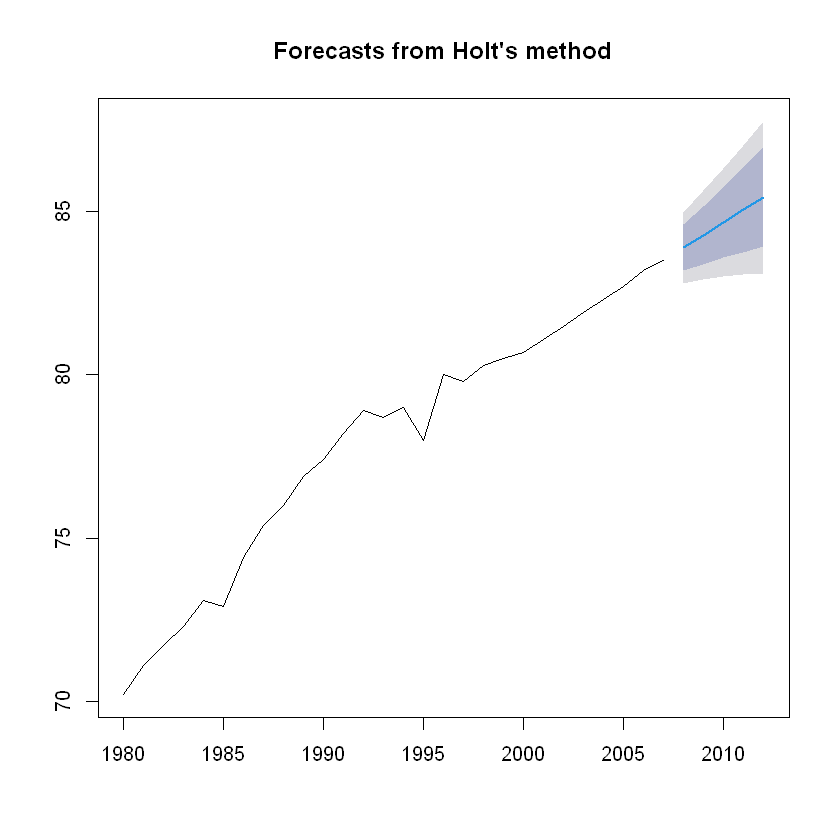

In [23]:
# Exponential smoothing with holt
holttrend <- holt(singapore, h = 5)
summary(holttrend)
plot(holttrend)


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
holt(y = singapore, h = 15, damped = T)

  Smoothing parameters:
    alpha = 0.5149 
    beta  = 1e-04 
    phi   = 0.9666 

  Initial states:
    l = 69.5404 
    b = 0.771 

  sigma:  0.5149

     AIC     AICc      BIC 
62.62649 66.62649 70.61972 

Error measures:
                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.01419094 0.4667051 0.3250851 0.01746896 0.419571 0.5319574
                     ACF1
Training set -0.001595197

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       83.72693 83.06701 84.38685 82.71766 84.73620
2009       84.00520 83.26291 84.74750 82.86996 85.14044
2010       84.27418 83.45776 85.09060 83.02557 85.52279
2011       84.53417 83.64979 85.41856 83.18163 85.88672
2012       84.78548 83.83798 85.73298 83.33641 86.23456
2013       85.02840 84.02171 86.03509 83.48880 86.56800
2014       85.26320 84.20060 86.32580 83.

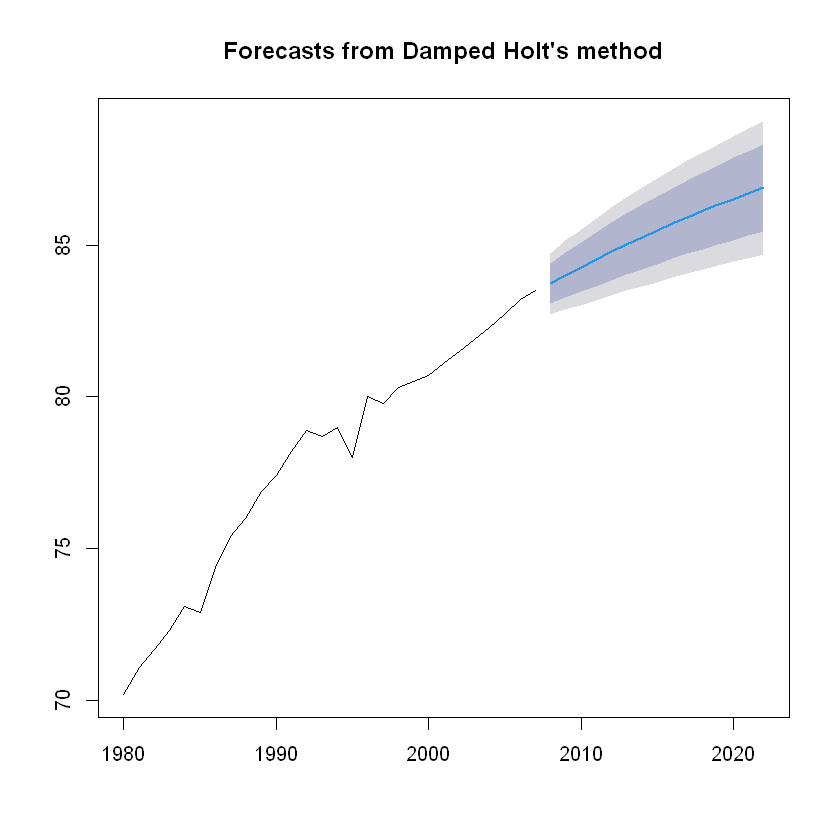

In [24]:
# Phi auto generated
plot(holt(singapore, h = 15, damped = T))
# To see the generated value for phi
summary(holt(singapore, h = 15, damped = T))

Series: singapore 
ARIMA(1,1,0) with drift 

Coefficients:
          ar1   drift
      -0.3690  0.4904
s.e.   0.1763  0.0720

sigma^2 = 0.2779:  log likelihood = -20.05
AIC=46.1   AICc=47.14   BIC=49.99

Training set error measures:
                      ME      RMSE       MAE        MPE      MAPE      MASE
Training set 0.006855948 0.4981113 0.3755194 0.01821962 0.4863707 0.6144862
                   ACF1
Training set 0.05505323

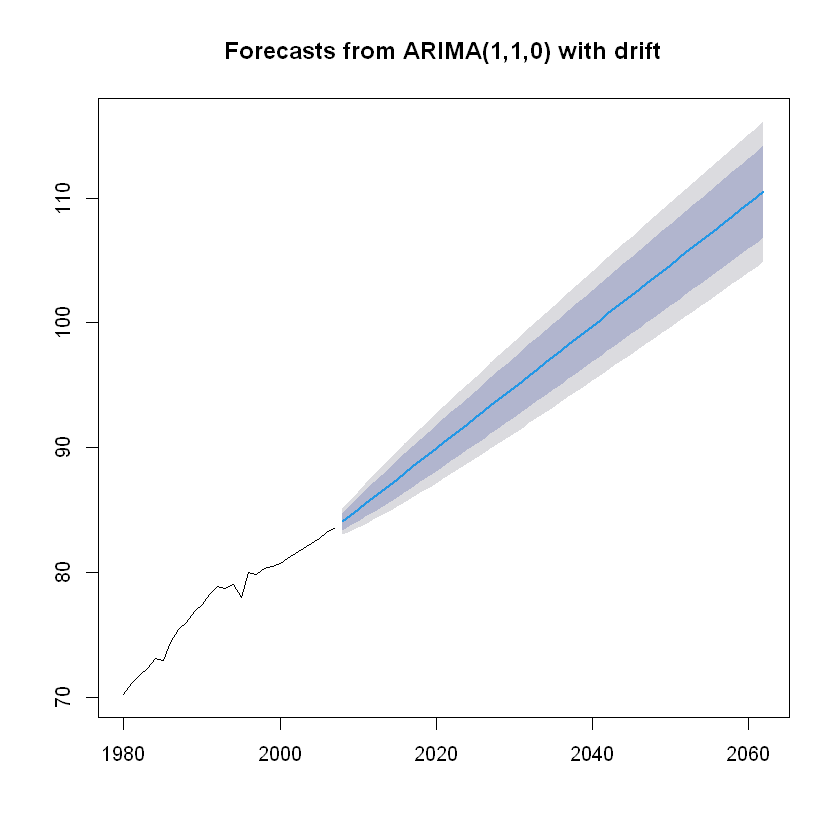

In [25]:
# Run auto.arima to generate model with automatic parameters, print summary and plot forecast.
singaporearima <- auto.arima(singapore)
summary(singaporearima)
plot(forecast(singaporearima, h = 55))

Series: singapore 
ARIMA(1,1,0) with drift 

Coefficients:
          ar1   drift
      -0.3690  0.4904
s.e.   0.1763  0.0720

sigma^2 = 0.2779:  log likelihood = -20.05
AIC=46.1   AICc=47.14   BIC=49.99

Training set error measures:
                      ME      RMSE       MAE        MPE      MAPE      MASE
Training set 0.006855948 0.4981113 0.3755194 0.01821962 0.4863707 0.6144862
                   ACF1
Training set 0.05505323

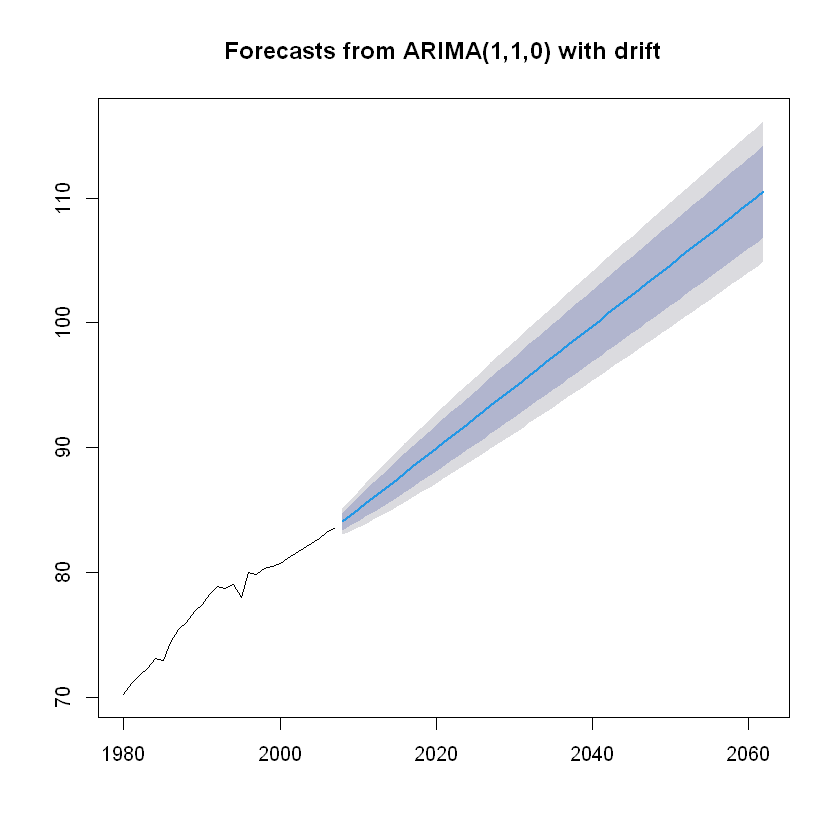

In [26]:
# Use stepwise = F to check chek all ARIMA models within search, and approximation = F to to use exact likelihood calculations for all models. 
# Print summary and plot the the model using forecast() with h = 55 to forecast the next 55 years.
singaporearima1 <- auto.arima(singapore, stepwise = F, approximation = F)
summary(singaporearima1)
plot(forecast(singaporearima1, h = 55))

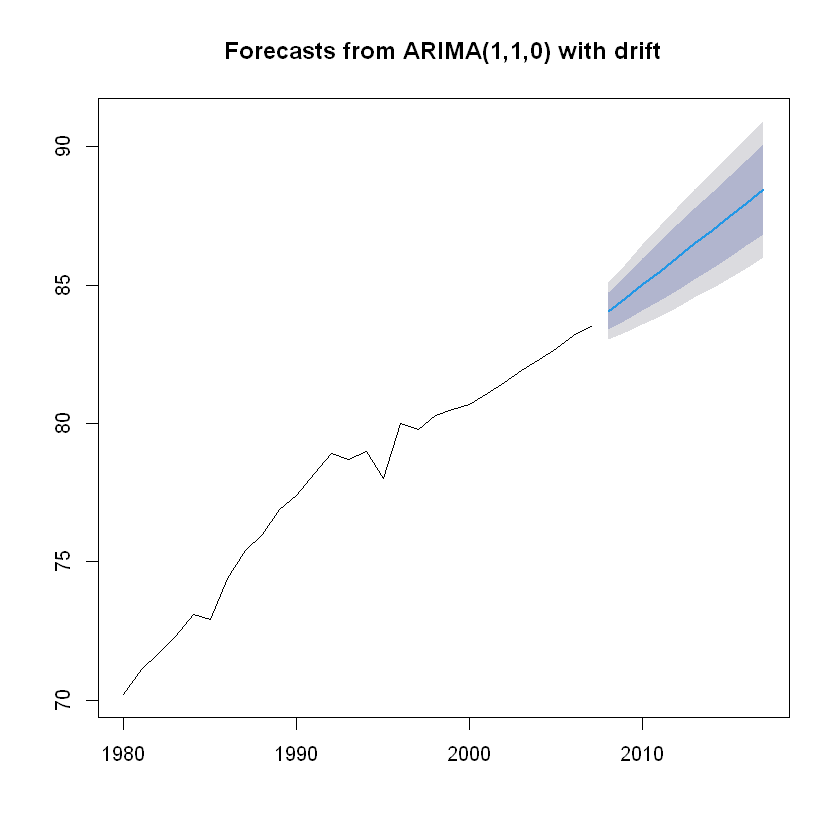

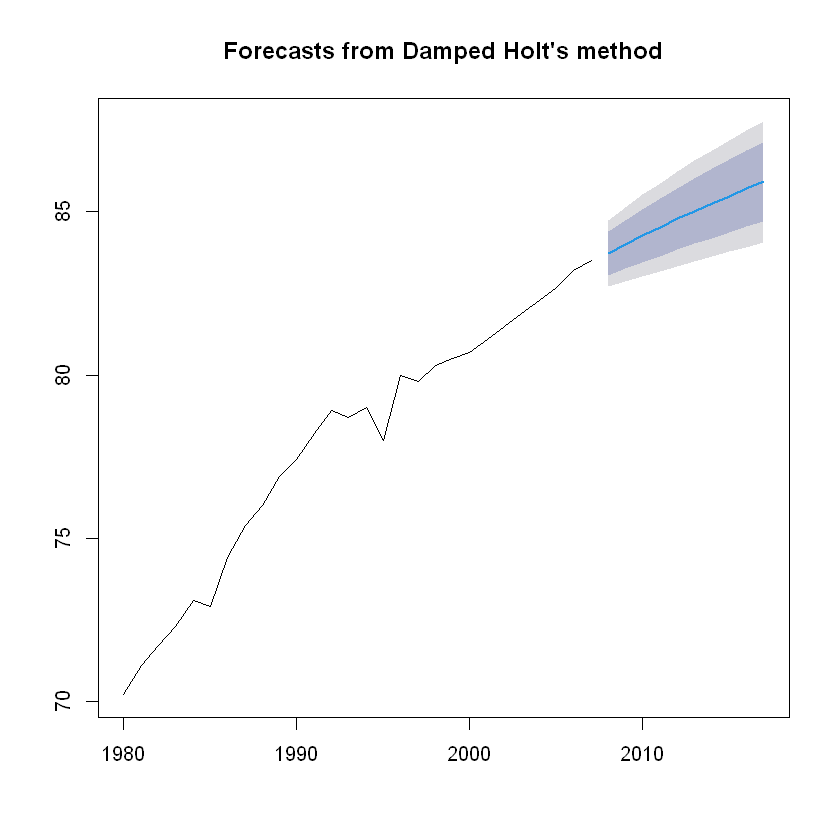

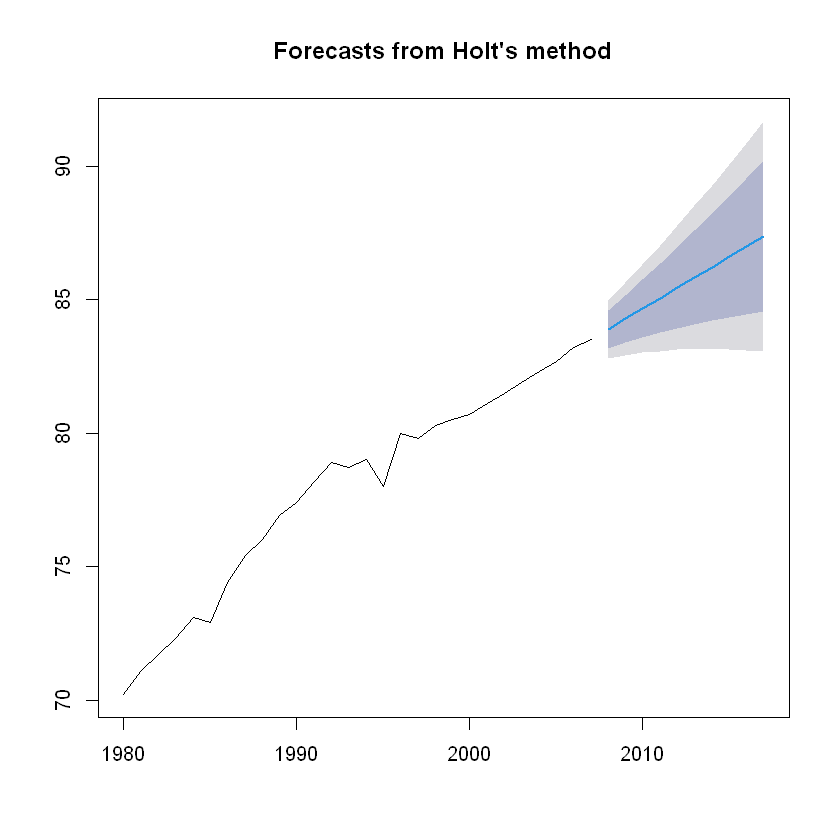

In [34]:
# Crete 3 models: Holt's linear trend, Holt's damped trend and ARIMA auto generated and plot them out.
holttrend <- holt(singapore, h = 10)
holtdamped <- holt(singapore, h = 10, damped = T)
arimafore <- forecast(auto.arima(singapore), h = 10)
plot(arimafore)
plot(holtdamped)
plot(holttrend)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


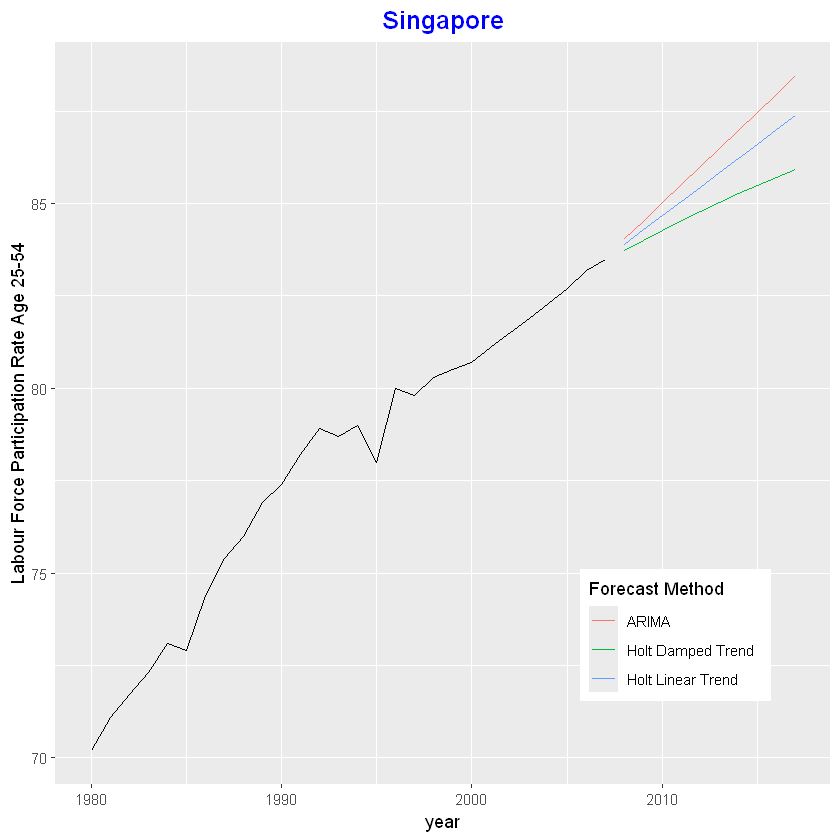

In [32]:
# 3 Forecast Lines as Comparison to visualize the Holt Damped is the most conservative model
# Use autoplot() for time series line graph, use forecast::autolayer() for adding forecast lines from $mean values of the 3 models.
# Add ggplot2 axis labels and title.
autoplot(singapore) +
    forecast::autolayer(holttrend$mean, series = "Holt Linear Trend") +
    forecast::autolayer(holtdamped$mean, series = "Holt Damped Trend") +
    forecast::autolayer(arimafore$mean, series = "ARIMA") +
    xlab("year") + ylab("Labour Force Participation Rate Age 25-54") +
    guides(color = guide_legend(title = "Forecast Method")) + theme(legend.position = c(0.8, 0.2)) +
    ggtitle("Singapore") + theme(plot.title = element_text(
        family = "Times", hjust = 0.5, color = "blue",
        face = "bold", size = 15
    )) 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


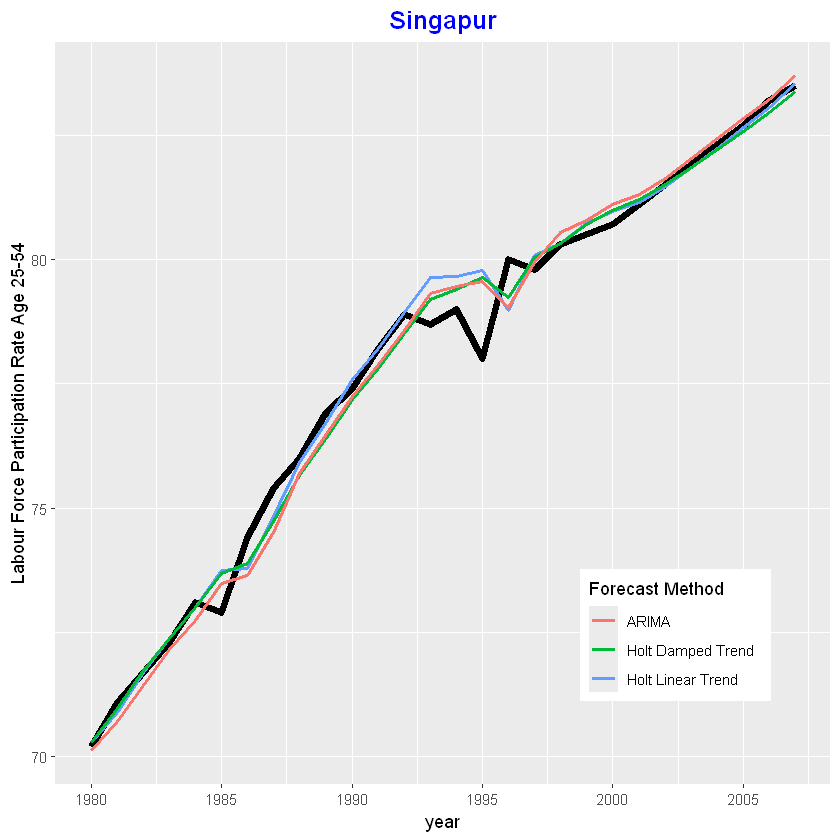

In [36]:
# Compare the fitted values of all 3 models with the actual data.
# The models react relatively well to the actual data.
autoplot(singapore) + geom_line(size = 2) +
    forecast::autolayer(holttrend$fitted, series = "Holt Linear Trend", size = 1.1) +
    forecast::autolayer(holtdamped$fitted, series = "Holt Damped Trend", size = 1.1) +
    forecast::autolayer(arimafore$fitted, series = "ARIMA", size = 1.1) +
    xlab("year") + ylab("Labour Force Participation Rate Age 25-54") +
    guides(colour = guide_legend(title = "Forecast Method")) + theme(legend.position = c(0.8, 0.2)) +
    ggtitle("Singapur") + theme(plot.title = element_text(
        family = "Times", hjust = 0.5,
        color = "blue", face = "bold", size = 15
    ))